=== Handle imports and paths ===

In [9]:
import sys
sys.path.append('/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/functions/') 
from paths_and_imports import *
from control_flow_functions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


=== Load the trained model ===

In [29]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

<All keys matched successfully>

=== Validate the model on the CN and AD testing sets ===

Cognitively Normal (CN) Subjects


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 7.682 across 1128 observations
Variance and MAE Loss: 108.611 across 1128 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_raw_age_gaps.png
Figure stats: mean = -1.7227107301117173 ; median = -1.5042725107699866 ; std = 6.203043648208301 ; var = 38.477750501577354
Factors: [-0.80490481 59.21785945]
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_CN_corrected_age_gaps.png
Figure stats: mean = -9.69513471534789e-07 ; median = -0.4046447722727393 ; std = 2.9805725895188977 ; var = 8.883812961391389

Top 10 significant age gaps:

               region hemi       age_gap variance  skew  region_avg     adj_pval
       G_temporal_inf   rh -6.58 (-8.3

<Figure size 640x480 with 0 Axes>

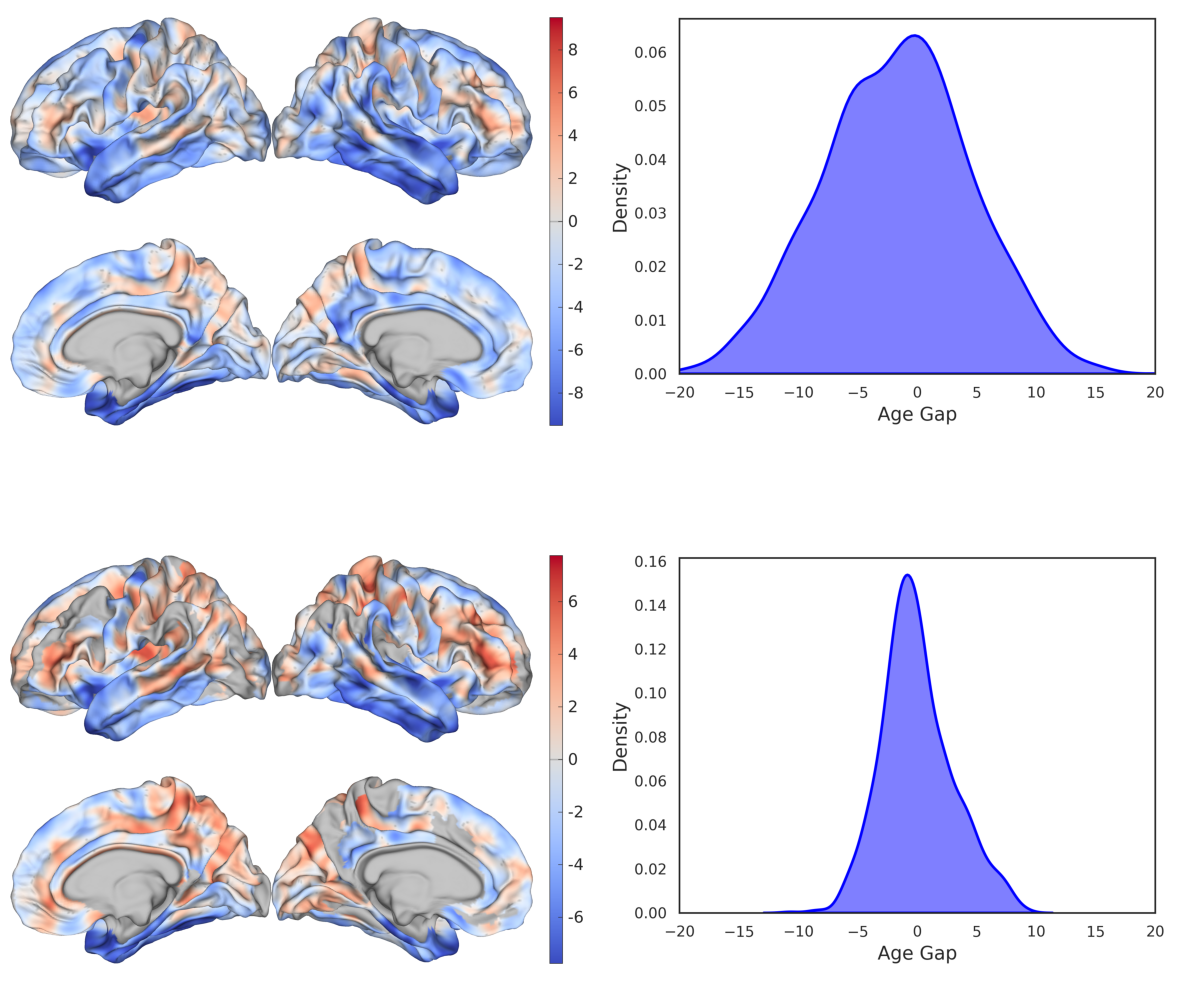

In [43]:
suffix='test_CN'
test_model(X_test_CN, y_test_CN, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=None, global_limits=20)

Alzheimer's Disease (AD) Subjects


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 8.682 across 477 observations
Variance and MAE Loss: 136.340 across 477 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_raw_age_gaps.png
Figure stats: mean = 0.5549297699215127 ; median = -0.21750593907790972 ; std = 8.158867920108715 ; var = 66.56712573777911
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_AD_corrected_age_gaps.png
Figure stats: mean = 2.6083808921494582 ; median = 2.4169310861741877 ; std = 3.3617050806931044 ; var = 11.301061049557832

Top 10 significant age gaps:

                   region hemi     age_gap variance  skew  region_avg     adj_pval
    S_temporal_transverse   lh 6.09 (4.04)    65.29 -0.28        3.95 5.90915

<Figure size 640x480 with 0 Axes>

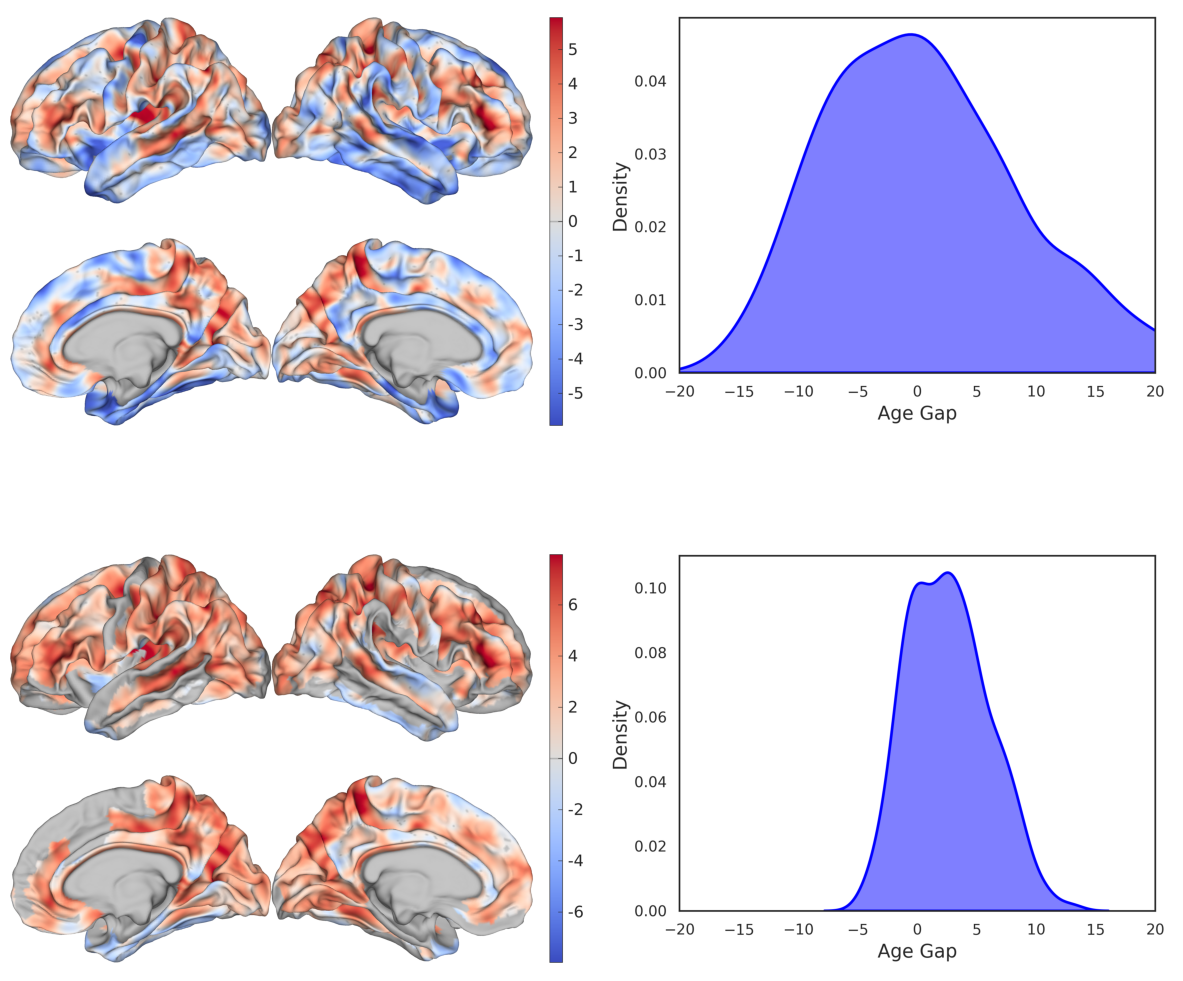

In [44]:
suffix='test_AD'
test_model(X_test_AD, y_test_AD, model=trained_model, suffix=suffix)
postprocess_model(suffix, factors=np.load(f'{output_dir}test_CN_factors.npy'))

View L-BAG difference for CNs and ADs


Top 10 significant age gaps:

               region hemi  age_gap    t_stat      raw_pval  region_avg      adj_pval  significant
       G_temporal_inf   rh 4.876206 70.899914  0.000000e+00    4.358764  0.000000e+00            1
        Pole_temporal   rh 4.841751 71.215449  0.000000e+00    4.676055  0.000000e+00            1
G_temp_sup-Plan_polar   rh 4.513749 18.602201  2.764841e-57    4.230655  4.147261e-57            1
        Pole_temporal   lh 4.510358 35.968426 2.317014e-171    4.676055 1.579782e-170            1
       S_temporal_inf   rh 4.503734 33.536596 6.330287e-142    4.084189 2.792774e-141            1
G_temp_sup-G_T_transv   rh 4.440349 31.123366  8.085902e-97    3.713255  1.925215e-96            1
        S_oc-temp_lat   rh 4.382002 43.638303 2.646252e-173    3.702710 1.984689e-172            1
G_oc-temp_med-Parahip   lh 4.361466 36.369945 2.678086e-193    4.293688 2.510706e-192            1
    G_temporal_middle   rh 4.311656 43.321542 1.384448e-267    4.104474 2.0766

(array([ 1.45660007,  3.55243443,  0.52744323, ..., -0.88309451,
        -0.85079553, -0.75310262]),
 array([-0.51508978,  1.50642536, -1.34538582, ..., -5.82892684,
        -5.43635656, -5.01431477]))

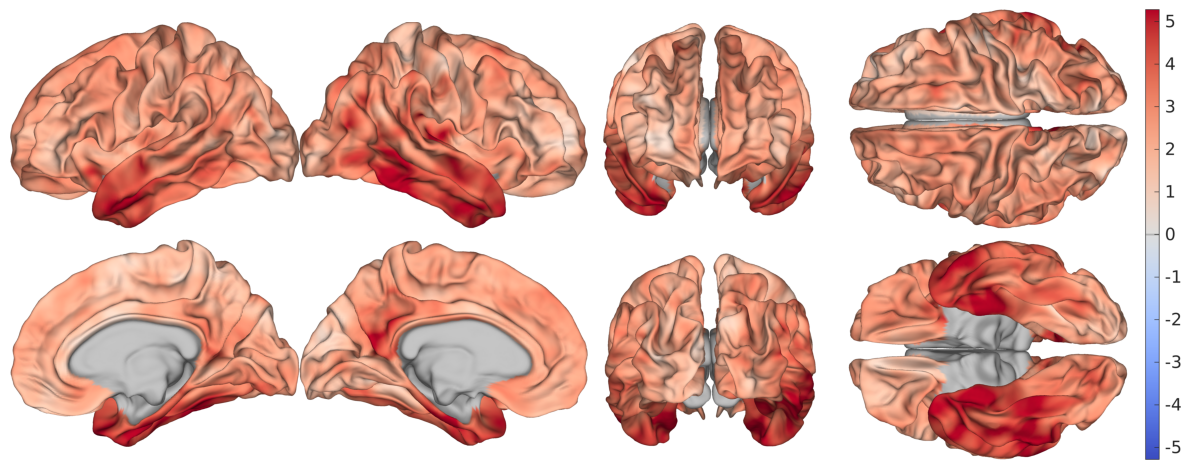

In [88]:
compare_cohorts(suffix='AD-CN', cohort_pred='test_AD', cohort_ref='test_CN') # pred - ref

Display the age gaps of the CN and AD sets

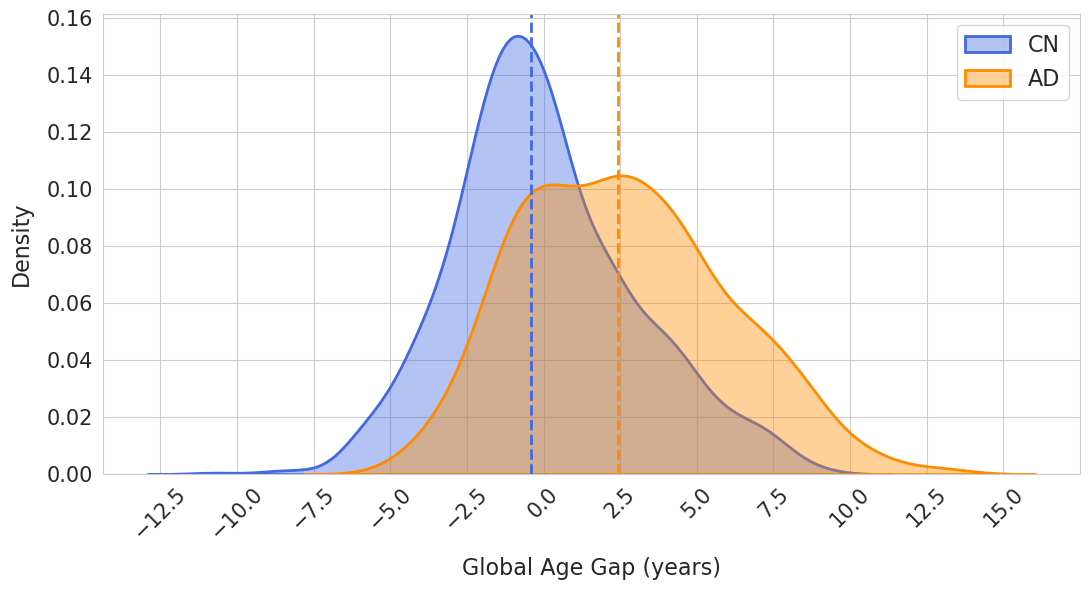

In [4]:
compare_age_gaps(np.load(f'{output_dir}test_CN_corrected_age_gaps.npy'), 
                 'CN',
                 np.load(f'{output_dir}test_AD_corrected_age_gaps.npy'), 
                 "AD")
plt.savefig(f'{output_dir}CN_AD_AGs.png')

Get the region stats, including average age gap, for CNs, ADs, and AD-CNs

In [47]:
print('\n\nCN\n')
show_ranked_differences(suffix='test_CN', output_dir=output_dir)
print('\n\nAD\n')
show_ranked_differences(suffix='test_AD', output_dir=output_dir)
print('\n\nAD-CN\n')
show_ranked_differences(suffix='AD-CN', output_dir=output_dir)



CN


All regions ranked by average age gap:
Region                               Avg Gap   LH Gap   RH Gap
-------------------------------------------------------------------------------------
S_postcentral                           3.17     2.82     3.51 
S_intrapariet_and_P_trans               3.04     3.29     2.78 
S_circular_insula_sup                   2.73     3.28     2.18 
S_front_inf                             2.72     2.07     3.38 
S_orbital_lateral                       2.72     2.88     2.56 
S_cingul-Marginalis                     2.46     1.91     3.01 
S_central                               2.38     2.81     1.94 
S_front_middle                          2.35     1.36     3.34 
Lat_Fis-ant-Horizont                    2.31     2.48     2.15 
S_parieto_occipital                     1.89     1.40     2.38 
S_oc_sup_and_transversal                1.73     1.59     1.88 
Lat_Fis-ant-Vertical                    1.64     2.17     1.10 
S_front_sup                          

=== Determine relationship between brain age gap and cognitive scores ===

Regress global brain age gap and cognitive scores

In [39]:
# Associate regions with colloquial names
regions = {'all' : 'BA'}
global_results, _ = regress_cognitive(data_dir, output_dir, cog_path, test_relations, regions=regions, subset=True, postprocess_obj=postprocess())
global_results.to_csv(f'{output_dir}global_cog_tests.csv')

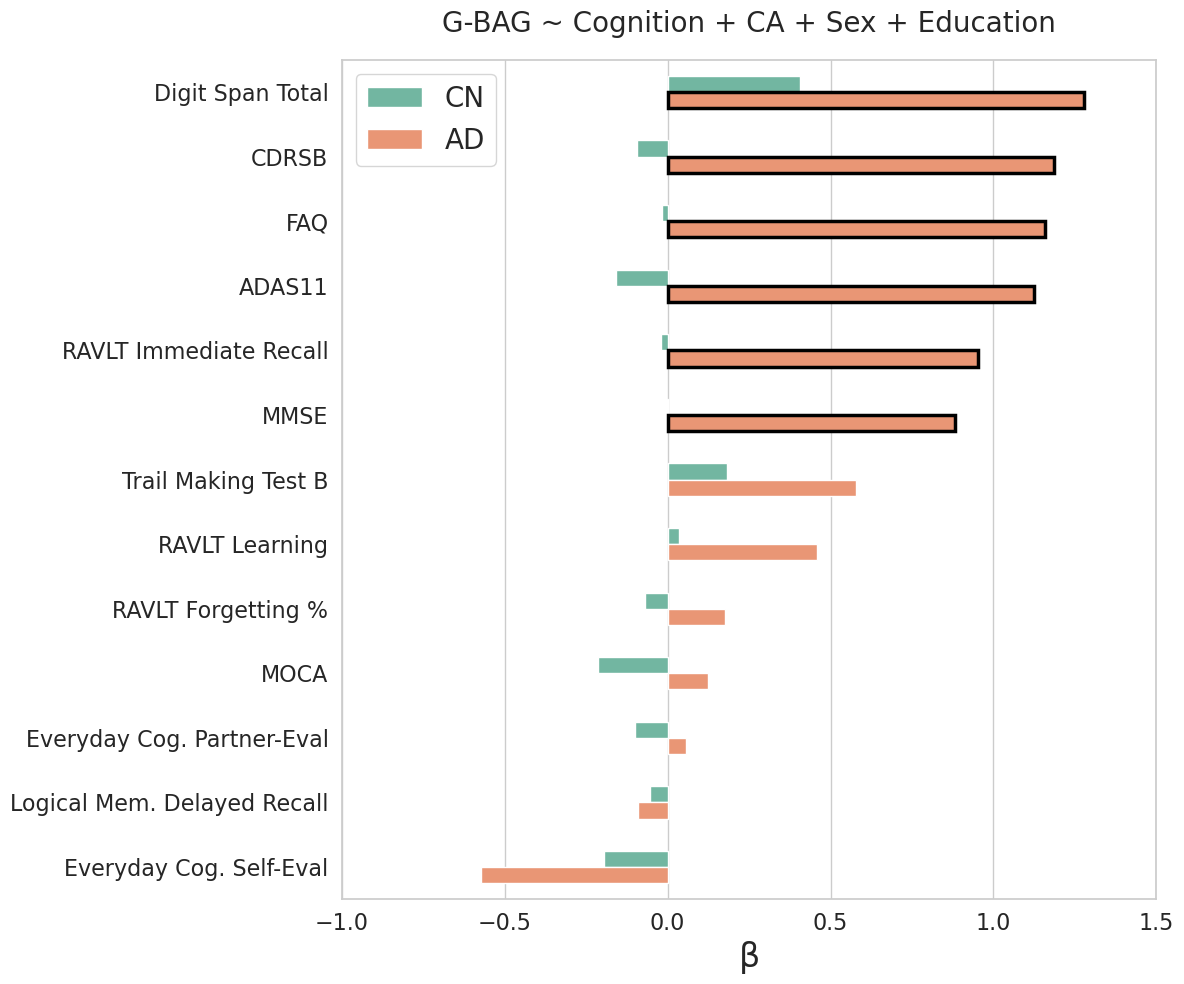

In [131]:
# Load in the global results and add a column for overlap
global_results = pd.read_csv(f'{output_dir}global_cog_tests.csv')

# Replace certain tests to make them more readable
global_results['test'] = global_results['test'].replace({
    'DIGITSCOR': 'Digit Span Total',
    'RAVLT_immediate': 'RAVLT Immediate Recall',
    'TRABSCOR': 'Trail Making Test B',
    'RAVLT_learning': 'RAVLT Learning',
    'RAVLT_perc_forgetting': 'RAVLT Forgetting %',
    'EcogSPTotal': 'Everyday Cog. Partner-Eval',
    'LDELTOTAL': 'Logical Mem. Delayed Recall',
    'EcogPtTotal': 'Everyday Cog. Self-Eval'
})

# Set style
sns.set(style='whitegrid')

# Determine how to plot the axes
y_axis = 'test'
x_axis = 'coef'
hue='cohort'

# Sort y-axis by max coef across cohorts
sorted_order = (
    global_results
    .groupby(y_axis)[x_axis]
    .max()
    .sort_values(ascending=False)
    .index
)

# Create the basic plot
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(
    data=global_results,
    y=y_axis,
    x=x_axis,
    hue=hue,
    palette='Set2',
    ax=ax,
    width=0.5,
    order=sorted_order
)

plt.title('G-BAG ~ Cognition + CA + Sex + Education', fontsize=20, pad=20)
plt.xlabel('β', fontsize=24)
plt.ylabel('')

plt.legend(fontsize=20)

plt.xlim([-1, 1.5])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Bold significant bars
bold_significant_bars(global_results, plt.gca(), y_axis, hue, hue_order=['CN', 'AD'])

# Save figure
plt.tight_layout()
plt.savefig(f'{output_dir}global_cog_barplot.png', dpi=300)

Regress local BAs for each region, for each test

In [46]:
# Get the regression results
local_results, cog_arrays, _ = regress_cognitive(data_dir, output_dir, cog_path, test_relations, 
                                              subset=False, postprocess_obj=postprocess(), get_beta_arrays=True)

# Save the df and cog arrays
local_results.to_csv(f'{output_dir}local_cog_tests.csv')
with open(f'{output_dir}cog_test_values/all_cog_arrays.pkl', 'wb') as f: 
    pickle.dump(cog_arrays, f)

Plot the CDRSB Betas on the Cortex

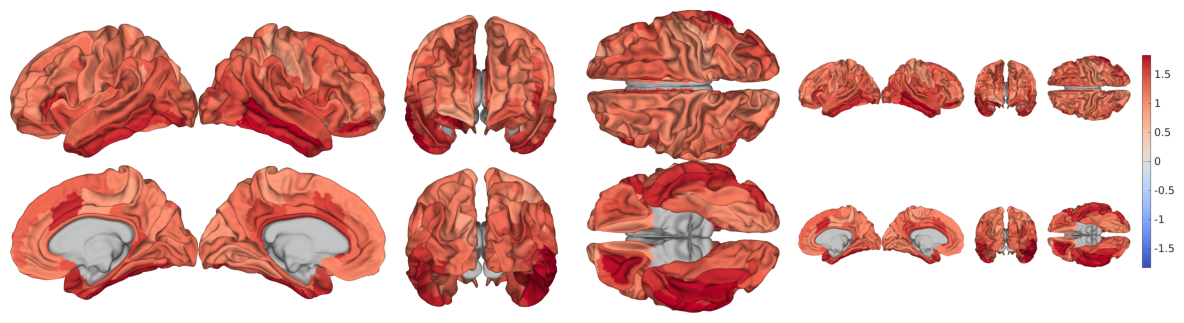

In [138]:
# Format desired array
array_to_plot = cog_arrays['DIGITSCOR_AD'].copy()
p = postprocess()

# Only include top 10%
#threshold = np.percentile(array_to_plot[array_to_plot != 0], 75)  # exclude zeros if you want
#array_to_plot = np.where(array_to_plot >= threshold, array_to_plot, 0)  # or np.nan if you prefer

# Clip outliers
array_to_plot = p.clip_outliers(array_to_plot, 1, 99)

# Save for visualization
p.get_matlab(array_to_plot, output_path=f'{output_dir}DIGITSCOR_betas')

# Create the MATLAB files
mat_files = [f'{output_dir}DIGITSCOR_betas']
matlab_file_list = "{" + ",".join([f"'{f}'" for f in mat_files]) + "}"

# Generate PNGs using the MATLAB code
command_primary = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'lat_L','lat_R','med_R','med_L'}}, [], false); exit"]
command_alt = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'ant','dor','pos','ven'}}, [], false); exit"]
command_all = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'all'}}); exit"]
#
result = subprocess.run(command_primary, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
#print(result)
result = subprocess.run(command_alt, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
#print(result)
result = subprocess.run(command_all, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
#print(result)

plot_paths = [
    f'{output_dir}DIGITSCOR_betas_latL_latR_medR_medL.png',
    f'{output_dir}DIGITSCOR_betas_ant_dor_pos_ven.png',
    f'{output_dir}DIGITSCOR_betas_all.png'
]

# Plot the generated images
fig, axes = plt.subplots(1, 3, figsize=(12, 10))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for i, (ax, path) in enumerate(zip(axes, plot_paths)):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()

In [49]:
local_results[
    (local_results['test'] == 'DIGITSCOR') & 
    (local_results['cohort'] == 'AD')
].sort_values(by='region_avg', ascending=False).head(6)

,cohort,test,test_n_subjects,region,hemi,coef,raw_pval,r_squared,is_inverted,adj_pval,region_avg
2361,AD,DIGITSCOR,DIGITSCOR\n(n=94),G_temporal_inf,lh,1.729530,0.000337,0.230762,True,0.001946,1.762044
2286,AD,DIGITSCOR,DIGITSCOR\n(n=94),G_temporal_inf,rh,1.794558,0.000668,0.190009,True,0.002476,1.762044
2385,AD,DIGITSCOR,DIGITSCOR\n(n=94),S_oc-temp_lat,lh,1.638091,0.001348,0.191794,True,0.002974,1.750785
2310,AD,DIGITSCOR,DIGITSCOR\n(n=94),S_oc-temp_lat,rh,1.863478,0.000870,0.175373,True,0.002513,1.750785
2287,AD,DIGITSCOR,DIGITSCOR\n(n=94),G_temporal_middle,rh,1.818482,0.000946,0.188470,True,0.002513,1.717595
2362,AD,DIGITSCOR,DIGITSCOR\n(n=94),G_temporal_middle,lh,1.616708,0.001048,0.179149,True,0.002604,1.717595


In [ ]:
matlab -nodisplay -nosplash -r "generate_brain({'/mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/CDRSB_betas.mat'}, {'all'}, [], false); exit"